## Environment Setup
Installed libraries: pandas, numpy, yfinance, pynance, matplotlib, seaborn, textblob. Updated requirements.txt with specific versions for reproducibility. 
Noted: TA-Lib installation failed due to unavailable binary links; implemented technical indicators using pandas and numpy instead.

In [19]:
import numpy as np
import pynance as pn
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import os
from textblob import TextBlob
import seaborn as sns
from scipy.stats import pearsonr

## Data Loading and Preparation
Loaded historical stock price data for AAPL, AMZN, GOOG, META, MSFT, NVDA, and TSLA using yfinance
Verified data includes Open, High, Low, Close, and Volume columns.
Cleaned data by forward-filling missing values and setting the date as the index.
Saved cleaned data to data/ directory as CSV files for reproducibility.

In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
import os

# Define stocks and date range
stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
start_date = '2020-01-01'
end_date = '2025-06-04'

# Create data directory
os.makedirs('data', exist_ok=True)

# Delete existing CSV files
for stock in stocks:
    file_path = f'data/{stock}_historical_data.csv'
    if os.path.exists(file_path):
        os.remove(file_path)
        print(f"Deleted existing {file_path}")

# Download and save data
for stock in stocks:
    file_path = f'data/{stock}_historical_data.csv'
    try:
        df = yf.download(stock, start=start_date, end=end_date, auto_adjust=False)
        if df.empty:
            print(f"No data downloaded for {stock}")
            continue
        print(f"{stock} raw DataFrame columns: {list(df.columns)}")
        # Flatten multi-index columns
        df.columns = [col[0] for col in df.columns]
        # Reset index
        df = df.reset_index()
        print(f"{stock} DataFrame columns before saving: {list(df.columns)}")
        df.to_csv(file_path, index=False)
        print(f"Saved {stock} data to {file_path} with shape: {df.shape}")
    except Exception as e:
        print(f"Error downloading/saving {stock}: {e}")
        continue

# Load data
files = [f'data/{stock}_historical_data.csv' for stock in stocks]
all_data = {}

for file in files:
    try:
        # Inspect raw CSV
        with open(file, 'r') as f:
            raw_lines = [f.readline().strip() for _ in range(3)]
            print(f"First 3 lines of {file}:\n{raw_lines}")
        
        # Load CSV
        df = pd.read_csv(file, index_col='Date', parse_dates=True)
        print(f"Columns for {file} (after index): {list(df.columns)}")
        
        # Verify expected columns
        expected_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
        if not all(col in df.columns for col in expected_columns):
            print(f"Missing columns in {file}. Available: {list(df.columns)}")
            continue
        
        # Select columns
        df = df[expected_columns]
        
        # Convert to numeric
        df = df.astype(float)
        
        df = df.dropna()
        symbol = file.split('/')[-1].split('_')[0]
        all_data[symbol] = df
        print(f"{symbol.upper()} data loaded with shape: {df.shape}")
    except Exception as e:
        print(f"Error processing {file}: {e}")
        continue

# Check all_data
print(f"Stocks in all_data: {list(all_data.keys())}")
if not all_data:
    raise RuntimeError("No stocks loaded. Check errors above.")

# Inspect AAPL
stock_data = all_data['AAPL']
print("AAPL DataFrame head:")
print(stock_data.head())
print("AAPL DataFrame dtypes:")
print(stock_data.dtypes)
print("AAPL DataFrame null counts:")
print(stock_data.isnull().sum())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Deleted existing data/AAPL_historical_data.csv
Deleted existing data/AMZN_historical_data.csv
Deleted existing data/GOOG_historical_data.csv
Deleted existing data/META_historical_data.csv
Deleted existing data/MSFT_historical_data.csv
Deleted existing data/NVDA_historical_data.csv
Deleted existing data/TSLA_historical_data.csv
AAPL raw DataFrame columns: [('Adj Close', 'AAPL'), ('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]
AAPL DataFrame columns before saving: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Saved AAPL data to data/AAPL_historical_data.csv with shape: (1362, 7)
AMZN raw DataFrame columns: [('Adj Close', 'AMZN'), ('Close', 'AMZN'), ('High', 'AMZN'), ('Low', 'AMZN'), ('Open', 'AMZN'), ('Volume', 'AMZN')]
AMZN DataFrame columns before saving: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Saved AMZN data to data/AMZN_historical_data.csv with shape: (1362, 7)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

GOOG raw DataFrame columns: [('Adj Close', 'GOOG'), ('Close', 'GOOG'), ('High', 'GOOG'), ('Low', 'GOOG'), ('Open', 'GOOG'), ('Volume', 'GOOG')]
GOOG DataFrame columns before saving: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Saved GOOG data to data/GOOG_historical_data.csv with shape: (1362, 7)
META raw DataFrame columns: [('Adj Close', 'META'), ('Close', 'META'), ('High', 'META'), ('Low', 'META'), ('Open', 'META'), ('Volume', 'META')]
META DataFrame columns before saving: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Saved META data to data/META_historical_data.csv with shape: (1362, 7)
MSFT raw DataFrame columns: [('Adj Close', 'MSFT'), ('Close', 'MSFT'), ('High', 'MSFT'), ('Low', 'MSFT'), ('Open', 'MSFT'), ('Volume', 'MSFT')]
MSFT DataFrame columns before saving: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Saved MSFT data to data/MSFT_historical_data.csv with shape: (1362, 7)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NVDA raw DataFrame columns: [('Adj Close', 'NVDA'), ('Close', 'NVDA'), ('High', 'NVDA'), ('Low', 'NVDA'), ('Open', 'NVDA'), ('Volume', 'NVDA')]
NVDA DataFrame columns before saving: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Saved NVDA data to data/NVDA_historical_data.csv with shape: (1362, 7)
TSLA raw DataFrame columns: [('Adj Close', 'TSLA'), ('Close', 'TSLA'), ('High', 'TSLA'), ('Low', 'TSLA'), ('Open', 'TSLA'), ('Volume', 'TSLA')]
TSLA DataFrame columns before saving: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Saved TSLA data to data/TSLA_historical_data.csv with shape: (1362, 7)
First 3 lines of data/AAPL_historical_data.csv:
['Date,Adj Close,Close,High,Low,Open,Volume', '2020-01-02,72.62085723876953,75.0875015258789,75.1500015258789,73.79750061035156,74.05999755859375,135480400', '2020-01-03,71.91482543945312,74.35749816894531,75.1449966430664,74.125,74.2874984741211,146322800']
Columns for data/AAPL_historical_data.csv (after index): ['

## compute Simple Moving Average (SMA), Relative Strength Index (RSI), and Moving Average Convergence Divergence (MACD) to analyze stock trends and momentum.

In [21]:
def calculate_sma(series, period):
    return series.rolling(window=period).mean()

def calculate_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = np.where(avg_loss != 0, avg_gain / avg_loss, 0)
    rsi = 100 - (100 / (1 + rs))
    return pd.Series(rsi, index=series.index)

def calculate_macd(series, fast_period=12, slow_period=26, signal_period=9):
    ema_fast = series.ewm(span=fast_period, adjust=False).mean()
    ema_slow = series.ewm(span=slow_period, adjust=False).mean()
    macd = ema_fast - ema_slow
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    hist = macd - signal
    return macd, signal, hist

# Apply indicators
for symbol, df in all_data.items():
    df['SMA20'] = calculate_sma(df['Close'], 20)
    df['SMA50'] = calculate_sma(df['Close'], 50)
    df['RSI'] = calculate_rsi(df['Close'], 14)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = calculate_macd(df['Close'])
    all_data[symbol] = df

# Verify AAPL
print("AAPL DataFrame with indicators (tail):")
print(all_data['AAPL'].tail())

AAPL DataFrame with indicators (tail):
                  Open        High         Low       Close      Volume  \
Date                                                                     
2025-05-28  200.589996  202.729996  199.899994  200.419998  45339700.0   
2025-05-29  203.580002  203.809998  198.509995  199.949997  51396800.0   
2025-05-30  199.369995  201.960007  196.779999  200.850006  70819900.0   
2025-06-02  200.279999  202.130005  200.119995  201.699997  35423300.0   
2025-06-03  201.350006  203.770004  200.960007  203.270004  46381600.0   

                 SMA20       SMA50        RSI      MACD  MACD_signal  \
Date                                                                   
2025-05-28  204.729500  205.942801  55.279819 -1.527274    -0.809544   
2025-05-29  204.102000  205.688001  53.176644 -1.666307    -0.980897   
2025-05-30  203.478500  205.400201  53.006750 -1.684451    -1.121608   
2025-06-02  203.295999  205.152201  33.271987 -1.611665    -1.219619   
2025-06-03

## Use PyNance for Financial Metrics

In [22]:
# Calculate daily returns
for symbol, df in all_data.items():
    df['Daily_Return'] = df['Close'].pct_change()
    all_data[symbol] = df

# Verify AAPL
print("AAPL DataFrame with daily returns (tail):")
print(all_data['AAPL'][['Close', 'Daily_Return']].tail())

AAPL DataFrame with daily returns (tail):
                 Close  Daily_Return
Date                                
2025-05-28  200.419998      0.001049
2025-05-29  199.949997     -0.002345
2025-05-30  200.850006      0.004501
2025-06-02  201.699997      0.004232
2025-06-03  203.270004      0.007784


## Create plots to visualize the Close price with SMAs, RSI, and MACD using Matplotlib.

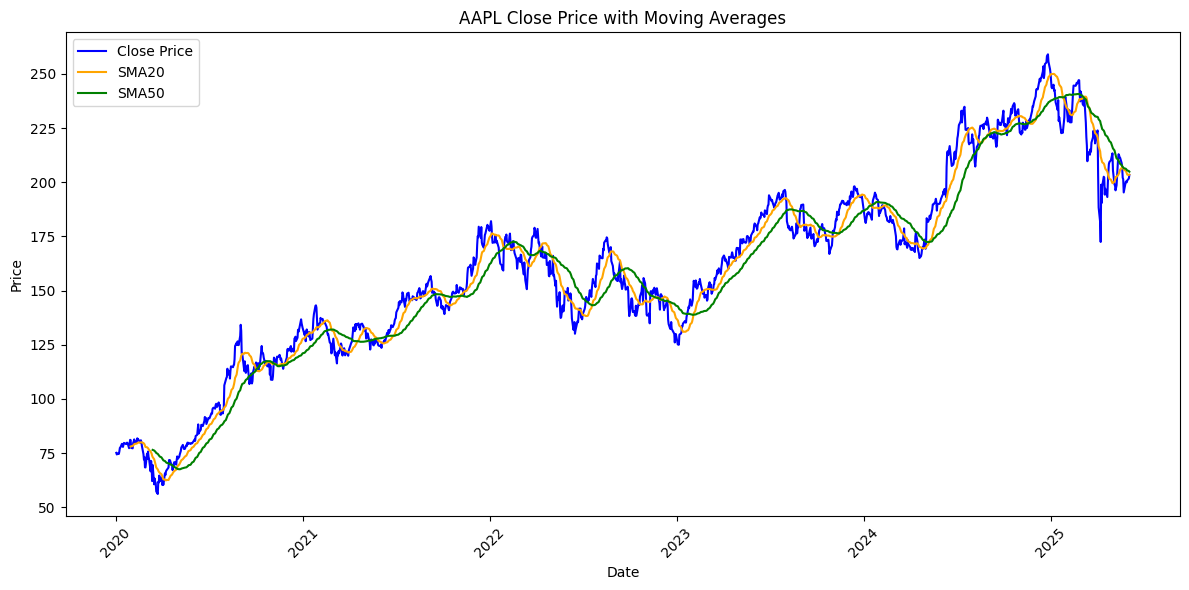

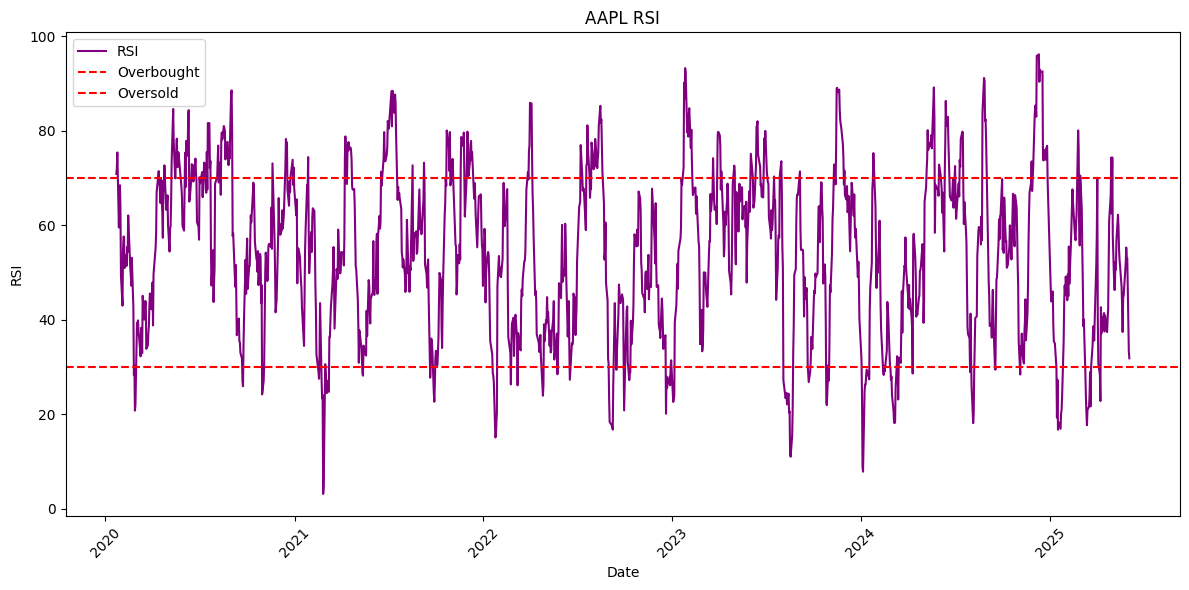

In [38]:
def plot_sma(df, symbol):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.plot(df.index, df['SMA20'], label='SMA20', color='orange')
    plt.plot(df.index, df['SMA50'], label='SMA50', color='green')
    plt.title(f'{symbol.upper()} Close Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'../plots/{symbol}_sma.png')
    plt.show()

def plot_rsi(df, symbol):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['RSI'], label='RSI', color='purple')
    plt.axhline(y=70, color='red', linestyle='--', label='Overbought')
    plt.axhline(y=30, color='red', linestyle='--', label='Oversold')
    plt.title(f'{symbol.upper()} RSI')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'../plots/{symbol}_rsi.png')
    plt.show()

# Create plots directory
os.makedirs('plots', exist_ok=True)

# Plot for AAPL
plot_sma(all_data['AAPL'], 'AAPL')
plot_rsi(all_data['AAPL'], 'AAPL')

## Task 3: News Sentiment and Stock Returns Correlation
Analyzes news sentiment using TextBlob, aligns with stock returns, computes correlations, and visualizes relationships.

In [39]:
# Define stocks and date range
stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
start_date = '2020-01-01'
end_date = '2025-06-04'

# Load news data
news_file = '../data/raw_analyst_ratings.csv'  # Adjust path if in data/
try:
    news_df = pd.read_csv(news_file)
    print("News DataFrame head:")
    print(news_df.head())
    print("News DataFrame columns:", list(news_df.columns))
except FileNotFoundError:
    print(f"Error: {news_file} not found. Ensure file is in the correct directory.")
    raise

# Clean and filter news data
news_df['date'] = pd.to_datetime(news_df['date'], utc=True, errors='coerce').dt.tz_convert('America/New_York')
news_df = news_df.dropna(subset=['date', 'headline', 'stock'])
news_df = news_df[news_df['stock'].isin(stocks)]
news_df = news_df[(news_df['date'] >= start_date) & (news_df['date'] <= end_date)]
print(f"Filtered news data shape: {news_df.shape}")
print("News data date range:", news_df['date'].min(), "to", news_df['date'].max())

News DataFrame head:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-

In [40]:
# Calculate sentiment
def get_sentiment(headline):
    return TextBlob(headline).sentiment.polarity  # -1 (negative) to +1 (positive)

news_df['sentiment'] = news_df['headline'].apply(get_sentiment)

# Aggregate daily sentiment per stock
daily_sentiment = news_df.groupby(['stock', news_df['date'].dt.date])['sentiment'].mean().reset_index()
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])
daily_sentiment = daily_sentiment.pivot(index='date', columns='stock', values='sentiment').fillna(0)
print("Daily sentiment DataFrame head:")
print(daily_sentiment.head())
print("Daily sentiment shape:", daily_sentiment.shape)

Daily sentiment DataFrame head:
stock       AAPL  AMZN      GOOG  NVDA  TSLA
date                                        
2020-05-31   0.0   0.0  0.000000  0.00   0.0
2020-06-02   0.0   0.0  0.000000  0.25   0.0
2020-06-04   0.0   0.0  0.000000  0.00   0.0
2020-06-05   0.0   0.0 -0.051852  0.00   0.0
2020-06-08   0.0   0.0  0.139394  0.00   0.0
Daily sentiment shape: (7, 5)


In [41]:
# Step 3: Align sentiment with returns
returns_df = pd.DataFrame({stock: all_data[stock]['Daily_Return'] for stock in stocks})
returns_df.index = pd.to_datetime(returns_df.index)
print("returns_df columns:", returns_df.columns)
print("returns_df head:")
print(returns_df.head())
print("daily_sentiment columns:", daily_sentiment.columns)
print("daily_sentiment head:")
print(daily_sentiment.head())
aligned_df = returns_df.join(daily_sentiment, how='inner', lsuffix='_return', rsuffix='_sentiment')
print("Aligned DataFrame head:")
print(aligned_df.head())
print("Aligned DataFrame shape:", aligned_df.shape)
os.makedirs('data/cleaned', exist_ok=True)
# aligned_df.to_csv('data/cleaned/aligned_sentiment_returns.csv')
# print("Saved aligned data to data/cleaned/aligned_sentiment_returns.csv")

returns_df columns: Index(['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA'], dtype='object')
returns_df head:
                AAPL      AMZN      GOOG      META      MSFT      NVDA  \
Date                                                                     
2020-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2020-01-03 -0.009722 -0.012139 -0.004907 -0.005291 -0.012452 -0.016006   
2020-01-06  0.007968  0.014886  0.024657  0.018834  0.002585  0.004194   
2020-01-07 -0.004703  0.002092 -0.000624  0.002164 -0.009118  0.012107   
2020-01-08  0.016086 -0.007809  0.007880  0.010138  0.015928  0.001876   

                TSLA  
Date                  
2020-01-02       NaN  
2020-01-03  0.029633  
2020-01-06  0.019255  
2020-01-07  0.038801  
2020-01-08  0.049205  
daily_sentiment columns: Index(['AAPL', 'AMZN', 'GOOG', 'NVDA', 'TSLA'], dtype='object', name='stock')
daily_sentiment head:
stock       AAPL  AMZN      GOOG  NVDA  TSLA
date                             

In [42]:
# Step 4: Compute correlations
correlations = {}
for stock in stocks:
    return_col = f'{stock}_return'
    sentiment_col = f'{stock}_sentiment'
    if return_col in aligned_df and sentiment_col in aligned_df:
        corr, p_value = pearsonr(aligned_df[return_col].dropna(), aligned_df[sentiment_col].dropna())
        correlations[stock] = {'correlation': corr, 'p_value': p_value}
    else:
        correlations[stock] = {'correlation': np.nan, 'p_value': np.nan}
corr_df = pd.DataFrame(correlations).T
print("Correlation results:")
print(corr_df)
# corr_df.to_csv('data/cleaned/correlations.csv')
# print("Saved correlations to data/cleaned/correlations.csv")

Correlation results:
      correlation   p_value
AAPL     0.586164  0.221454
AMZN     0.168738  0.749295
GOOG    -0.094944  0.858013
META          NaN       NaN
MSFT          NaN       NaN
NVDA     0.206929  0.694036
TSLA     0.677961  0.138865


Available stocks for plotting: ['AAPL', 'AMZN', 'GOOG', 'NVDA', 'TSLA']
Saved scatter plot for AAPL to ../plots/AAPL_sentiment_vs_returns.png


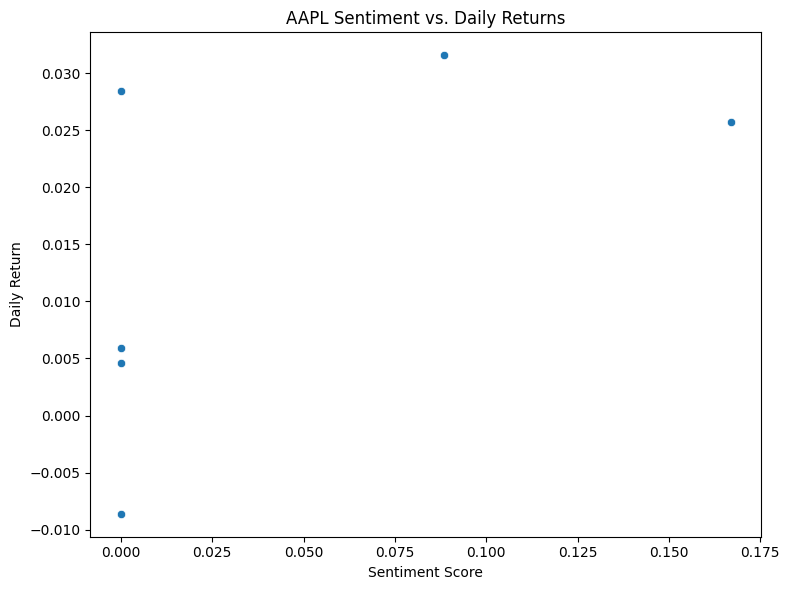

Saved scatter plot for AMZN to ../plots/AMZN_sentiment_vs_returns.png


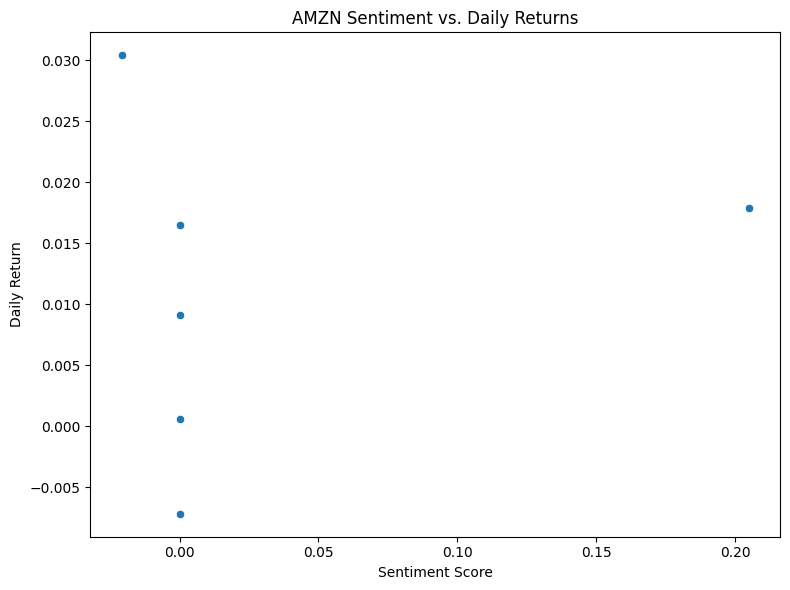

Saved scatter plot for GOOG to ../plots/GOOG_sentiment_vs_returns.png


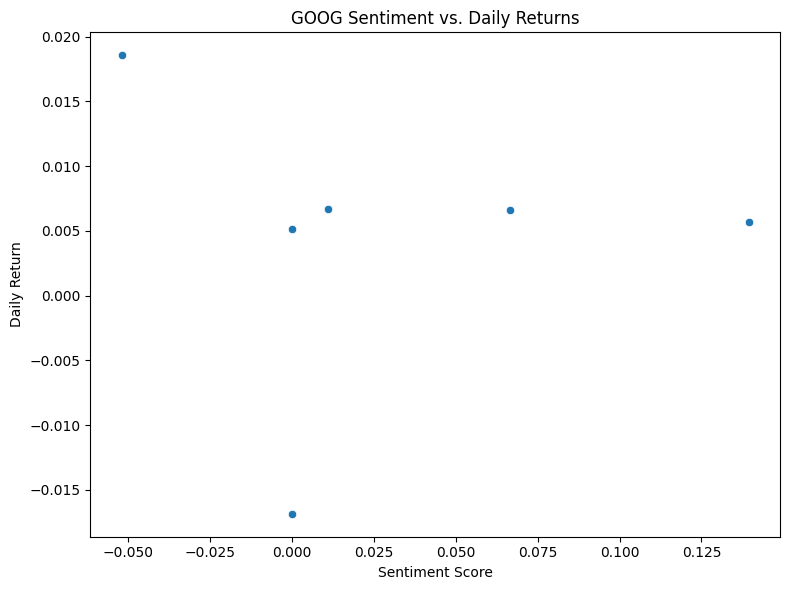

Saved scatter plot for NVDA to ../plots/NVDA_sentiment_vs_returns.png


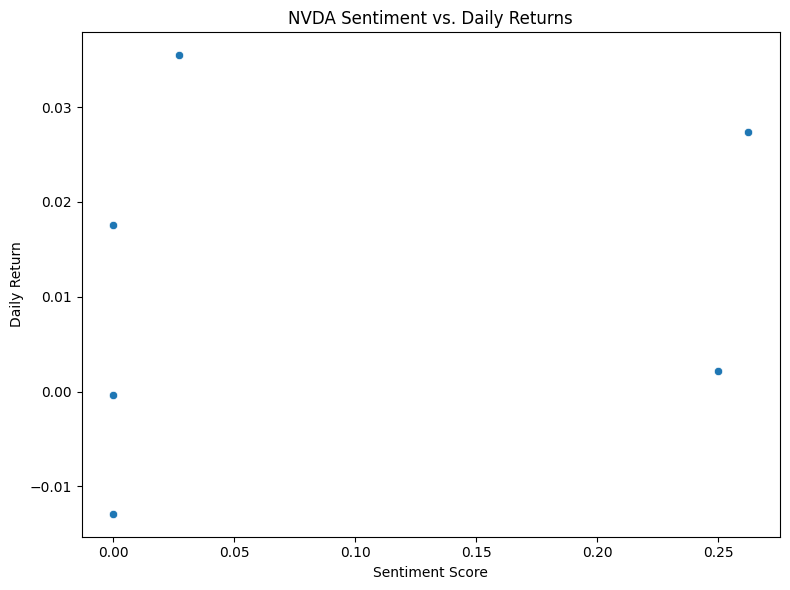

Saved scatter plot for TSLA to ../plots/TSLA_sentiment_vs_returns.png


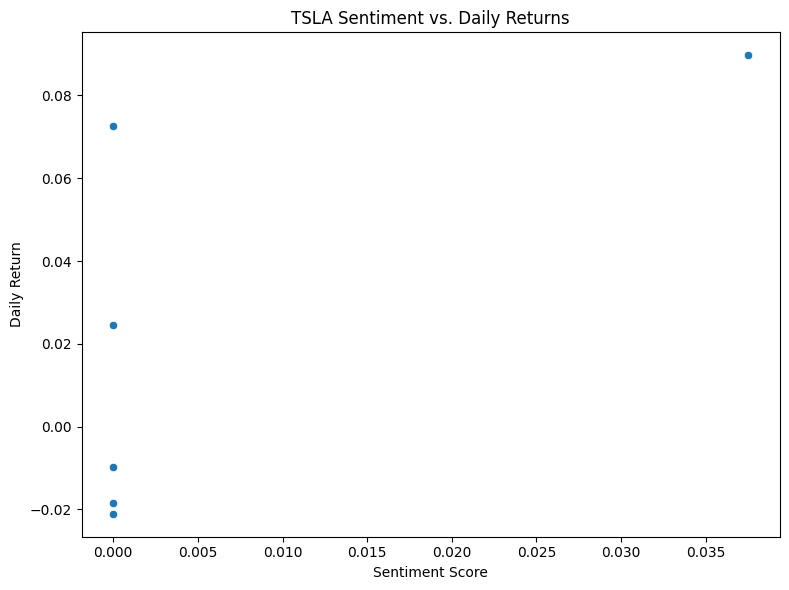

Saved time-series plot for AAPL to ../plots/AAPL_returns_sentiment_timeseries.png


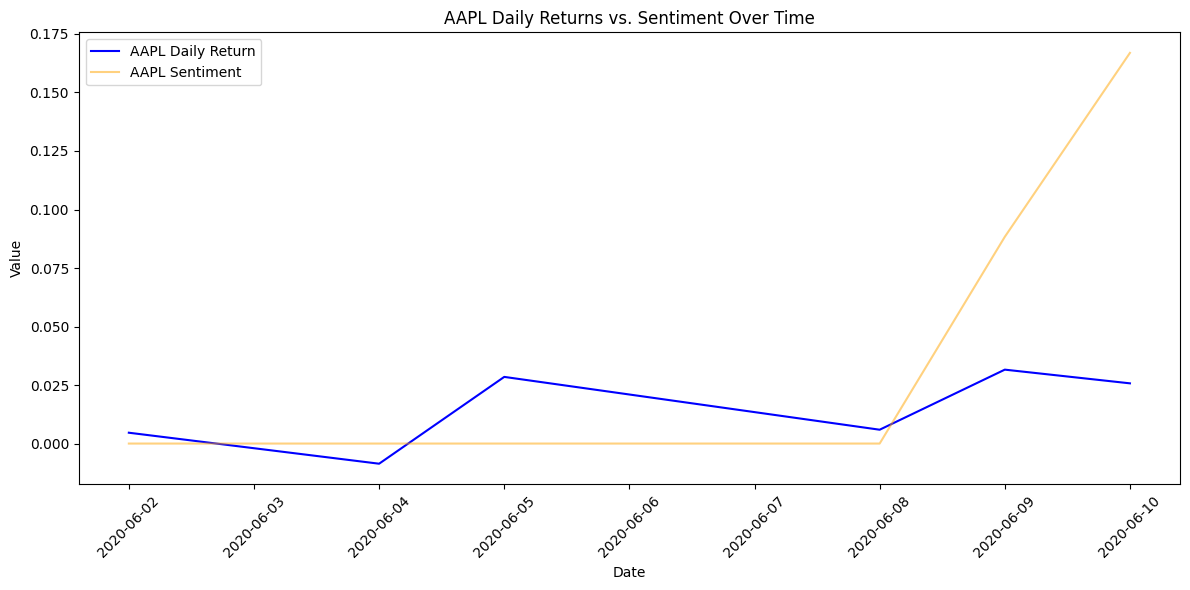

In [43]:
# Step 5: Visualize
os.makedirs('plots', exist_ok=True)
available_stocks = [stock for stock in stocks if f'{stock}_sentiment' in aligned_df.columns and f'{stock}_return' in aligned_df.columns]
print("Available stocks for plotting:", available_stocks)

for stock in available_stocks:
    try:
        # Validate data
        sentiment_data = aligned_df[f'{stock}_sentiment'].dropna()
        return_data = aligned_df[f'{stock}_return'].dropna()
        if len(sentiment_data) < 2 or len(return_data) < 2:
            print(f"Skipping {stock} plot: insufficient non-NaN data (sentiment: {len(sentiment_data)}, returns: {len(return_data)})")
            continue
        if sentiment_data.std() == 0 or return_data.std() == 0:
            print(f"Skipping {stock} plot: zero variance in data")
            continue
        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=aligned_df, x=f'{stock}_sentiment', y=f'{stock}_return')
        plt.title(f'{stock} Sentiment vs. Daily Returns')
        plt.xlabel('Sentiment Score')
        plt.ylabel('Daily Return')
        plt.tight_layout()
        plot_path = f'../plots/{stock}_sentiment_vs_returns.png'
        plt.savefig(plot_path)
        print(f"Saved scatter plot for {stock} to {plot_path}")
        plt.show()  # Display in Jupyter
        plt.close()
    except Exception as e:
        print(f"Error plotting scatter for {stock}: {e}")

if 'AAPL_sentiment' in aligned_df.columns and 'AAPL_return' in aligned_df.columns:
    try:
        aapl_sentiment = aligned_df['AAPL_sentiment'].dropna()
        aapl_return = aligned_df['AAPL_return'].dropna()
        if len(aapl_sentiment) < 2 or len(aapl_return) < 2:
            print("Skipping AAPL time-series: insufficient non-NaN data")
        elif aapl_sentiment.std() == 0 or aapl_return.std() == 0:
            print("Skipping AAPL time-series: zero variance in data")
        else:
            plt.figure(figsize=(12, 6))
            plt.plot(aligned_df.index, aligned_df['AAPL_return'], label='AAPL Daily Return', color='blue')
            plt.plot(aligned_df.index, aligned_df['AAPL_sentiment'], label='AAPL Sentiment', color='orange', alpha=0.5)
            plt.title('AAPL Daily Returns vs. Sentiment Over Time')
            plt.xlabel('Date')
            plt.ylabel('Value')
            plt.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            plot_path = '../plots/AAPL_returns_sentiment_timeseries.png'
            plt.savefig(plot_path)
            print(f"Saved time-series plot for AAPL to {plot_path}")
            plt.show()
            plt.close()
    except Exception as e:
        print(f"Error plotting AAPL time-series: {e}")
else:
    print("AAPL data missing; skipping time-series plot.")